<a href="https://colab.research.google.com/github/Musu1/Udacity_DataScience/blob/master/DiabetesCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [17]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
y=data['Outcome']
x=data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# **Random Forest Classifier Model**

In [0]:
model_rf = RandomForestClassifier()

param_dist = {"max_depth": [3, None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, x_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

random_search = RandomizedSearchCV(model_rf, param_distributions=param_dist)
random_search.fit(x_train, y_train)
preds_rf = random_search.best_estimator_.predict(x_test)


In [20]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Random Forest F1 Score -',f1_score(y_test,preds_rf))
print('Random Forest accuracy Score -',accuracy_score(y_test,preds_rf))
print('Random Forest precision Score -',precision_score(y_test,preds_rf))
print('Random Forest recall Score -',recall_score(y_test,preds_rf))

Random Forest F1 Score - 0.6909090909090909
Random Forest accuracy Score - 0.7792207792207793
Random Forest precision Score - 0.6909090909090909
Random Forest recall Score - 0.6909090909090909


# **AdaBoost Classifier model**

In [0]:
model_ada = AdaBoostClassifier()
param_dist = {"n_estimators": [10, 100, 200, 400],
              "learning_rate": [0.001, 0.005, .01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 10, 20]}

ada_search = RandomizedSearchCV(model_ada, param_distributions=param_dist)
ada_search.fit(x_train, y_train)
preds_ad = ada_search.best_estimator_.predict(x_test)

In [22]:
print('AdaBoost F1 Score -',f1_score(y_test,preds_ad))
print('AdaBoost accuracy Score -',accuracy_score(y_test,preds_ad))
print('AdaBoost precision Score -',precision_score(y_test,preds_ad))
print('AdaBoost recall Score -',recall_score(y_test,preds_ad))

AdaBoost F1 Score - 0.6534653465346534
AdaBoost accuracy Score - 0.7727272727272727
AdaBoost precision Score - 0.717391304347826
AdaBoost recall Score - 0.6


# **SVM Classifier**

In [0]:
model_svc = SVC()
param_dist = {"C": [0.1, 0.5, 1, 3, 5],
              "kernel": ['linear','rbf']
             }
svc_search = RandomizedSearchCV(model_svc, param_distributions=param_dist)
svc_search.fit(x_train, y_train)
svc_preds = svc_search.best_estimator_.predict(x_test)


In [28]:
print('SVM F1 Score -',f1_score(y_test,svc_preds))
print('SVM accuracy Score -',accuracy_score(y_test,svc_preds))
print('SVM precision Score -',precision_score(y_test,svc_preds))
print('SVM recall Score -',recall_score(y_test,svc_preds))

SVM F1 Score - 0.6545454545454545
SVM accuracy Score - 0.7532467532467533
SVM precision Score - 0.6545454545454545
SVM recall Score - 0.6545454545454545


# Feature importance


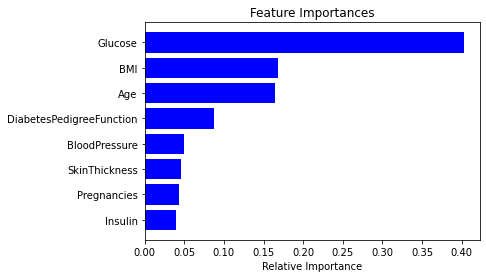

In [29]:
features = data.columns[:data.shape[1]]
importances = random_search.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance');